# **Rodrigo_Mesquita_DR4_TP1**
## **Inteligência Artificial: Clusterização [24E2_4]**

# 1.Cite e explique dois algoritmos de clusterização baseado em particionamento.

**K-Means**: O K-Means é um algoritimo de clusterizaçao não supervisionado, ou seja, que trabalha com dados não rotulados, os separando em uma quantidade de clusters pré-definida pelo usuário, com base na similaridade/proximidade entre cada amostra. Na primeira iteração o modelo escolhe posições aleatórios para os centróides e relaciona cada amostra ao centróide mais próximo, formando os clusters. Em seguida, recalcula a o posicionamento do centroide baseado na distância euclidiana de todos os pontos que foram atribuidos a ele. A cada iteração posterior o modelo executa novamente o relacionamento das amostras aos centroides e o ajuste do posicionamento, até que a variação de posicionamento do centroide entre cada iteração passe a ser insignificante ou atinja o número máximo de iterações.

**K-Medoids**: O K-Medoids também é um algoritimo de clusterização não supervisionado, porém, invés de escolher posições iniciais aleatórias para os centroides, ele escolhe pontos reais do conjunto de dados para servirem como medoides, em seguida atribui cada ponto ao medoide mais próximo com base em uma métrica de dissimilaridade. A cada iteração o modelo escolhe um novo ponto do cluster como medoide e recalcula a métrica para verificar se algum deles, se escolhido como novo medoide, melhoraria o resultado.
O K-Medoid possui menor sensibilidade a outliers e é mais adequado para clusters assimétricos, porém possui maior custo operacional.

# 2.Explique o principal algoritmo de clusterização, visto em sala de aula, baseado em densidade.


O DB-Scan, diferente dos métodos de particionamento, se baseia na densidade de pontos em uma mesma região. A quantidade de clusters é definida automaticamente baseado na quantidade de regiões com alta densidade de pontos e separadas entre si por espaços de menor densidade. Os pontos mais distantes dessas regiões (outliers) são considerados como ruídos, não sendo alocados em nenhum cluster.

# 3.Utilizando o dataset iris (sklearn.datasets.load_iris), utilize o KMeans e utilizando o método Silhouette, veja qual o número ideal de clusters. Faça uma conclusão dessa avaliação.


### Resposta: Com base nos gráficos plotados (Elbow e Silhouette) entendo como ideal K=3, pois o SSE caiu quase pela metade, de 150 para 80, e o silhouette score reduziu em apenas 0,15.

In [14]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [15]:
def elbow_plot(erro: dict) -> None:
  maximo = max(erro.values())
  for key in erro:
    erro[key]: float(erro[key])/maximo
  plt.figure(figsize=(4, 4))
  plt.plot(list(erro.keys()), list(erro.values()), label = "Método Elbow")
  plt.ylabel('SSE', fontsize=12)
  plt.xlabel('Clusters', fontsize=12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)
  plt.legend(loc='upper right')
  plt.show()

def silhouette_plot(silhouette: dict) -> None:
  plt.figure(figsize=(4, 4))
  plt.plot(list(silhouette.keys()), list(silhouette.values()), label = "Método Silhouette")
  plt.ylabel('Silhouette Score', fontsize=12)
  plt.xlabel('Clusters', fontsize=12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)
  plt.legend(loc='upper right')
  plt.show()

In [16]:
iris = load_iris()
X = iris.data

In [17]:
silhouette = {}
elbow = {}

for k in range(2, 11, 1):
    model = KMeans(n_clusters= k, max_iter=1000)
    model.fit(X)
    elbow[k] = model.inertia_
    preds = model.predict(X)
    silhouette[k] = silhouette_score(X, preds)

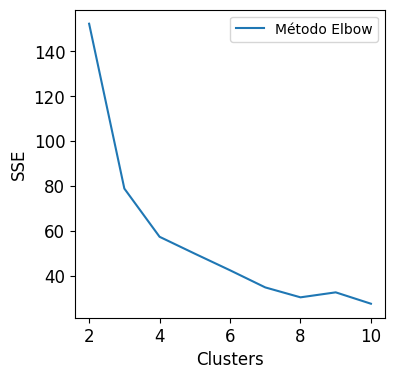

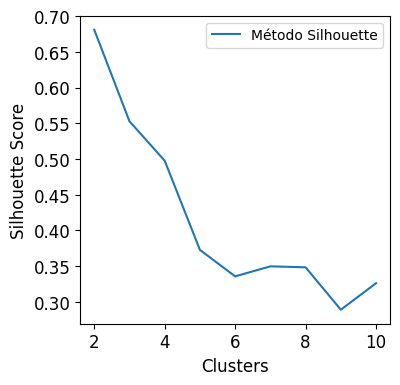

In [18]:
elbow_plot(elbow)
silhouette_plot(silhouette)

# 4.Utilizando o dataset iris (sklearn.datasets.load_iris), faça a redução de dimensionalidade utilizando KMeans e o PCA, utilize o modelo de regressão logística para comparar os resultados

In [33]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay


In [20]:
iris = load_iris()
X = iris.data
Y = iris.target

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [21]:
# Redução de dimensionalidade com KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

In [23]:
# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
# Regressão Logística sem redução de dimensionalidade
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(Y_test, y_pred_lr)

In [29]:
# Regressão Logística com redução de dimensionalidade usando KMeans
lr_kmeans = LogisticRegression()
lr_kmeans.fit(X_train_kmeans, Y_train)
y_pred_lr_kmeans = lr_kmeans.predict(X_test_kmeans)
acc_lr_kmeans = accuracy_score(Y_test, y_pred_lr_kmeans)

In [30]:
# Regressão Logística com redução de dimensionalidade usando PCA
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, Y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
acc_lr_pca = accuracy_score(Y_test, y_pred_lr_pca)

In [31]:
print(f'Acurácia da RL sem redução de dimensionalidade: {acc_lr}')
print(f'Acurácia da RL com redução de dimensionalidade usando KMeans: {acc_lr_kmeans}')
print(f'Acurácia da RL com redução de dimensionalidade usando PCA: {acc_lr_pca}')

Acurácia da RL sem redução de dimensionalidade: 0.9333333333333333
Acurácia da RL com redução de dimensionalidade usando KMeans: 0.9333333333333333
Acurácia da RL com redução de dimensionalidade usando PCA: 0.9666666666666667
